<a href="https://colab.research.google.com/github/JoshiDeepak08/Machine_learning/blob/main/project1_placement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pridiction of placement**






In [ ]:
# steps to follow for whole process...
# 0. preprocess, EDA, feaure selesction
# 1. extract input output coloumns
# 2. scale the values
# 3. train test split
# 4. train the model
# 5. evaluate the model\ model selection
# 6. deploy the model

In [ ]:
import pandas as pd
import numpy as nd




In [ ]:
df = pd.read_csv("/content/placement-dataset.csv")

In [ ]:
df.head()


,city,cgpa,iq,placement
0,New York,6.8,123.0,1
1,Los Angeles,5.9,106.0,0
2,Chicago,NaN,121.0,0
3,New York,7.4,132.0,1
4,Los Angeles,5.8,142.0,0


In [ ]:
#feature selection
#a)removing unused coloumns
df =df.drop('city', axis=1)

In [ ]:
df.head()


,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,NaN,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       92 non-null     float64
 1   iq         96 non-null     float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [ ]:
#b) removing null elements
df= df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       88 non-null     float64
 1   iq         88 non-null     float64
 2   placement  88 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 2.8 KB


In [ ]:
import matplotlib.pyplot as plt


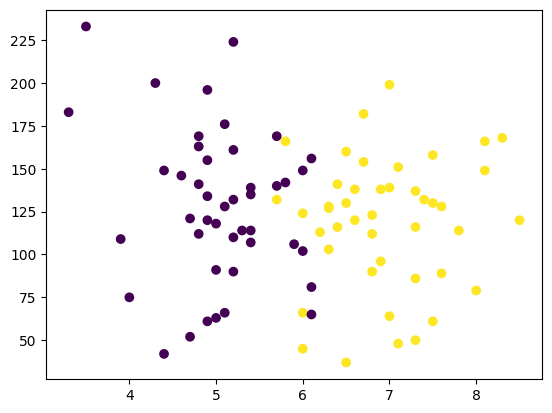

In [ ]:
plt.scatter(df['cgpa'], df['iq'], c= df['placement'])

In [ ]:
#here we will use logistic regression to train the model

In [ ]:
#train test split [extracting input and output from data and storing it in a variable]
X= df.iloc[: , 0:2]      #input
Y= df.pop('placement')   #output

In [ ]:
Y

0     1
1     0
3     1
4     0
5     1
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 88, dtype: int64

In [ ]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
3,7.4,132.0
4,5.8,142.0
5,7.1,48.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [ ]:
#extracting test data and train data (here 10% data is test data and 90% is trainig data)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(X,Y,test_size= 0.1)

In [ ]:
# scaling the values in range of -1 to 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [ ]:
x_train

array([[ 0.6563805 ,  0.01837838],
       [ 0.05141647,  0.80382809],
       [ 0.22426334, -0.45765175],
       [ 0.05141647, -1.36210899],
       [ 0.82922737, -1.3859105 ],
       [-0.55354756, -0.36244572],
       [ 0.3971102 , -2.02855117],
       [ 0.9156508 ,  0.68482056],
       [ 0.74280394,  0.37540097],
       [ 0.31068677,  0.44680549],
       [-0.55354756,  0.39920248],
       [-0.89924129, -1.409712  ],
       [ 0.22426334,  0.13738591],
       [ 0.05141647, -0.98128489],
       [ 0.6563805 , -0.24343819],
       [-0.63997099, -0.19583518],
       [ 2.12557886, -0.05302614],
       [ 1.77988513,  0.63721754],
       [-2.36843965,  1.44646876],
       [-0.89924129, -0.74326983],
       [-0.03500696,  0.04217988],
       [ 1.26134453,  0.18498892],
       [ 1.08849767, -0.86227736],
       [-0.72639442, -0.76707133],
       [ 1.52061483, -0.19583518],
       [-0.81281786,  0.13738591],
       [-1.50420532,  1.85109437],
       [ 0.3971102 ,  0.18498892],
       [ 0.48353364,

In [ ]:
x_test = scaler.transform(x_test)

In [ ]:
x_test

array([[-0.20785383,  1.04184315],
       [-0.55354756,  0.30399645],
       [-0.20785383,  0.470607  ],
       [-0.98566472, -0.05302614],
       [-1.15851159, -1.67152857],
       [ 0.48353364,  0.37540097],
       [-1.24493502,  0.56581302],
       [-1.07208816,  0.44680549],
       [ 1.952732  ,  1.08944617]])

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
#model training
clf.fit(x_train,y_train)

LogisticRegression()

In [ ]:
# model evaluation by predicting the output for test dataset
y_res = clf.predict(x_test)

In [ ]:
y_test

85    1
49    0
4     0
22    0
94    0
48    1
39    0
51    0
53    1
Name: placement, dtype: int64

In [ ]:
# to check the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_res)

0.8888888888888888

<Axes: >

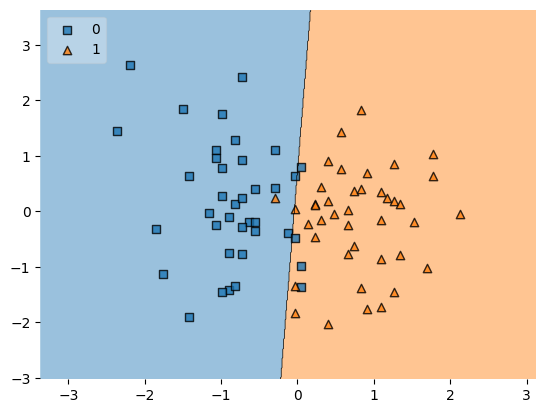

In [ ]:
#to see the boundary model concluded (decision boundary)
from mlxtend.plotting import plot_decision_regions

# Plotting decision regions
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [ ]:
#to dump the file that will be used to make website
import pickle
pickle.dump(clf,open('model.pkl','wb'))